# Готовим данные для домашки

In [3]:
import pandas as pd
from datetime import datetime

air_df = pd.read_csv('./data/air_quality.tar.gz', compression='gzip', sep=';', encoding='utf8')
air_df = air_df[air_df.iloc[:,0].notnull()]

# формируем 
air_df['ts'] = (air_df.iloc[:,0]+ ' ' + air_df.iloc[:,1]).map(
    lambda x: datetime.strptime(x.replace('.',':'), "%d/%m/%Y %H:%M:%S")
)

air_df.head(5)

air_quality.csv      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0      10/03/2004  18.00.00    2,6       1360.0     150.0     11,9   
1      10/03/2004  19.00.00      2       1292.0     112.0      9,4   
2      10/03/2004  20.00.00    2,2       1402.0      88.0      9,0   
3      10/03/2004  21.00.00    2,2       1376.0      80.0      9,2   
4      10/03/2004  22.00.00    1,6       1272.0      51.0      6,5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH                  ts  
0  13,6  48,9  0,7578 2004-03-10 18:00:00  
1  13,3  47,7  0,7255 2004-03-10 19:00:00  
2  11,9  54,0  0,7502 2004-03-10 20:00:00  
3  11,0  60,0  0,7867 2004-03-10 21:00:00  
4  11,2  59,6  0,7888 2004-03-10 22:00:00

# Визуализация данных с помощью matplotlib 

## 1. Чтение текстовых файлов, файловые дескрипторы

### 1.1

**Простая задача** Выберите любой показатель загрязнённости воздуха (кроме NOx(GT), его мы использовали в туториале) и постройте график по 30 последним доступным наблюдениям.

*Результат выполнения*

Должен получиться такой же график, как для NOx(GT) (из второго урока данного модуля).
![title](https://248006.selcdn.ru/public/Data-science-2/img/PearsonFig.jpg)

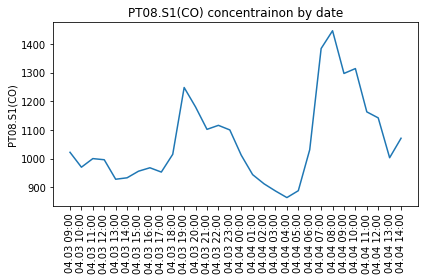

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

register_matplotlib_converters()
TAIL=30
# доступ к Figure и Subplot
fig, subplot = plt.subplots()
# формируем значения по оси  X
x_ticks = air_df['ts'].values[-TAIL:]
# формируем значения по оси Y
y_ticks = air_df['PT08.S1(CO)'].values[-TAIL:]
# график функции
subplot.plot(x_ticks, y_ticks)
subplot.set_title('PT08.S1(CO) concentrainon by date')
subplot.set_ylabel('PT08.S1(CO)')
x_labels = [pd.to_datetime(str(i)).strftime("%m.%d %H:%M") for i in air_df['ts'].values[-TAIL:]]
plt.xticks(x_ticks, rotation='vertical', labels=x_labels)

fig.tight_layout()
plt.show()

### 1.2

**Задание среднего уровня** Постройте scatter plot между выбранным вами показателем и температурой (содержится в столбце `air_df['T]`).

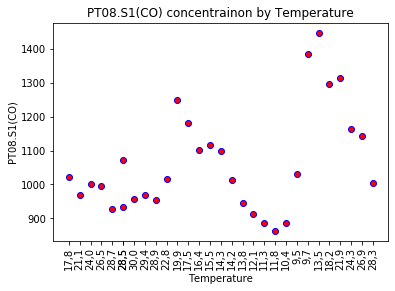

In [40]:
%matplotlib inline

register_matplotlib_converters()
TAIL=30
fig, subplot = plt.subplots()
# формируем значения отдельно по осям X и Y
x_values = air_df['T'].values[-TAIL:]
y_values = air_df['PT08.S1(CO)'].values[-TAIL:]
subplot.scatter(
    x=x_values, y=y_values, 
    marker='o', c='r', edgecolor='b'
)

subplot.set_ylabel('PT08.S1(CO)')
subplot.set_title('PT08.S1(CO) concentrainon by Temperature')
subplot.set_xlabel('Temperature')
plt.xticks(x_values, rotation='vertical')

plt.show()


### 1.3

**Задание высокого уровня** Аналогично тому, как мы строили два графика рядом, отобразите на одном полотне следующие 4 графика:
<pre>
['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)'].
</pre>
По каждому показателю учитывайте только последние 30 наблюдений. Значения оси X используйте из столбца T.

*Ожидаемый результат*

![title](https://248006.selcdn.ru/public/Data-science-2/img/four_pack.png)

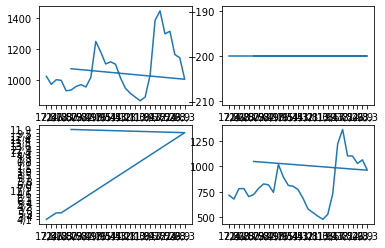

In [55]:

fig = plt.figure()

subplot1 = fig.add_subplot(221)
subplot1.plot(
    air_df['T'].values[-TAIL:], 
    air_df['PT08.S1(CO)'].values[-TAIL:]
)

subplot2 = fig.add_subplot(222)
subplot2.plot(
    air_df['T'].values[-TAIL:], 
    air_df['NMHC(GT)'].values[-TAIL:]
)

subplot3 = fig.add_subplot(223)
subplot3.plot(
    air_df['T'].values[-TAIL:], 
    air_df['C6H6(GT)'].values[-TAIL:]
)

subplot4 = fig.add_subplot(224)
subplot4.plot(
    air_df['T'].values[-TAIL:], 
    air_df['PT08.S2(NMHC)'].values[-TAIL:]
)


In [10]:
import json

from flask import Flask, request, Response

app = Flask(__name__)

stats = {
    'attempts' : 0,
    'success' : 0
}


@app.route('/')
def hello():
    return f'Hello, user! stats={stats}'

@app.route('/auth', methods=['POST'])
def auth():
    stats['attempts'] +=1

    data = request.json
    login = data['login']
    password = data['password']

    with open('users.json') as users_file:
        users = json.load(users_file)


    if login in users and users[login] == password:
        status_code = 200
        stats['success'] += 1
    else:
        status_code = 401

    return Response(status=status_code)


if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [20/May/2020 12:03:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:

127.0.0.1 - - [20/May/2020 12:03:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:03:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:03:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:07:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:07:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:07:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:07:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:09:53] "POST /auth HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2020 12:12:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:12:17] "POST /auth HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2020 12:39:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:39:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:39:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:42:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:42:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:42:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:42:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:42:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:42:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:43:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:44:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:44:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:45:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:45:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:47:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:47:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:47:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:47:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:47:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:47:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:47:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:48:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:48:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:48:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:48:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:48:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:48:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:49:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:49:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:49:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:49:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:50:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:50:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:50:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:50:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:50:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:50:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:52:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:52:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:52:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:53:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:53:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:53:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:53:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:53:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:53:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:53:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:53:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:53:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:50] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:51] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:52] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:54:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:54:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:55:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:55:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:55:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:55:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:55:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:55:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:55:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 12:57:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 12:57:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:05:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:05:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:00] "POST /auth HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2020 13:06:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:25] "POST /auth HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2020 13:06:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:06:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:07:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:07:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:07:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:07:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:08:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:08:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:08:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:08:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:08:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:09:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:09:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:09:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:10:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:10:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:10:03] "POST /auth HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2020 13:10:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:

127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:53] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:17:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:54] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:17:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:55] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:56] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:17:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:57] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:17:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:58] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:17:59] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:00] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:01] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:02] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:18:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:03] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:04] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:05] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:06] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:07] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:08] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:09] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:10] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:11] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:12] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:13] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:14] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:15] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:16] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:17] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:18] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:19] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:20] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:21] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:22] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:23] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:24] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:25] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:26] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:27] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:28] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:29] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:30] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:31] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:32] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:33] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:34] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:35] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:36] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:37] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:38] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:39] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:40] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:41] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:42] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:43] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:44] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:45] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:46] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:47] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:48] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202

127.0.0.1 - - [20/May/2020 13:20:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/2020 13:20:49] "POST /auth HTTP/1.1" 401 -
127.0.0.1 - - [20/May/202